# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | sibu
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | chaplynka
Processing Record 6 of Set 1 | smidovich
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | quatre cocos
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | spornoye
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | mrirt
City not found. Skipping...
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | tuktoyaktuk
Processing 

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,10.66,66,100,3.13,AR,1667491311
1,rikitea,-23.1203,-134.9692,20.73,69,100,6.80,PF,1667491513
2,sibu,2.3000,111.8167,23.93,98,99,0.84,MY,1667491567
3,tasiilaq,65.6145,-37.6368,1.09,98,100,5.59,GL,1667491568
4,chaplynka,46.3651,33.5403,10.33,51,11,2.22,UA,1667491568


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,10.66,66,100,3.13,AR,1667491311
1,rikitea,-23.1203,-134.9692,20.73,69,100,6.80,PF,1667491513
2,sibu,2.3000,111.8167,23.93,98,99,0.84,MY,1667491567
3,tasiilaq,65.6145,-37.6368,1.09,98,100,5.59,GL,1667491568
4,chaplynka,46.3651,33.5403,10.33,51,11,2.22,UA,1667491568


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

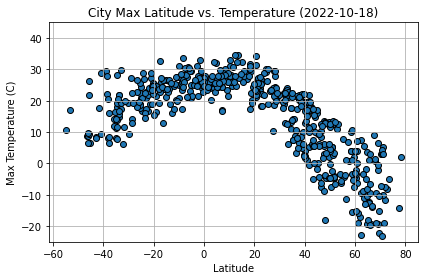

In [4]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.ylim(-25, 45)
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

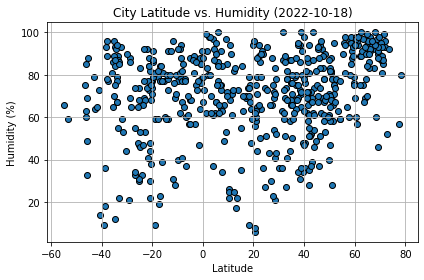

In [5]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

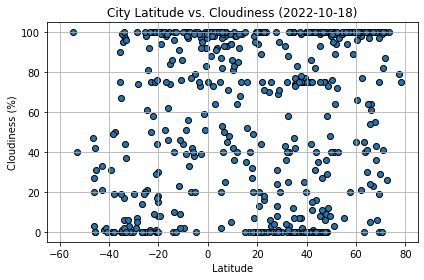

In [6]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5, 105)
plt.xlim(-65, 85)
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

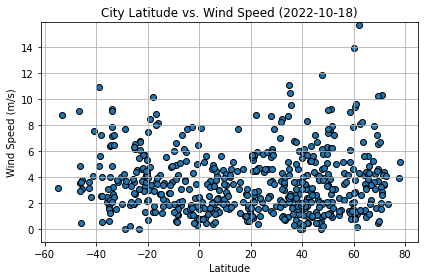

In [7]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.ylim(-1, 15.9)
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def linear_regression_plot(y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, ann_coor, fontsize=15, color="red")
    plt.xlim(x_lims)
    plt.ylim(y_lims)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sibu,2.3000,111.8167,23.93,98,99,0.84,MY,1667491567
3,tasiilaq,65.6145,-37.6368,1.09,98,100,5.59,GL,1667491568
4,chaplynka,46.3651,33.5403,10.33,51,11,2.22,UA,1667491568
5,smidovich,48.6000,133.8167,-4.77,60,12,3.89,RU,1667491569
6,georgetown,5.4112,100.3354,27.72,86,20,2.06,MY,1667491215


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,10.66,66,100,3.13,AR,1667491311
1,rikitea,-23.1203,-134.9692,20.73,69,100,6.80,PF,1667491513
9,punta arenas,-53.1500,-70.9167,17.06,59,40,8.75,CL,1667491570
10,arraial do cabo,-22.9661,-42.0278,22.92,53,75,6.69,BR,1667491571
11,quatre cocos,-20.2078,57.7625,23.94,77,18,4.24,MU,1667491571


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7279627494872757


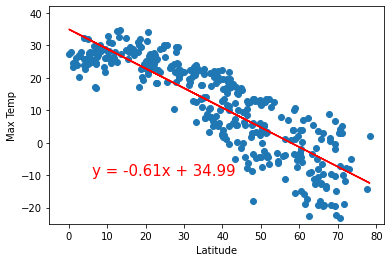

In [62]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_lims = [-5, 82]
y_lims = [-25, 42]
ann_coor = [6, -10]
linear_regression_plot("Max Temp")

The r-value is: 0.41315231158651156


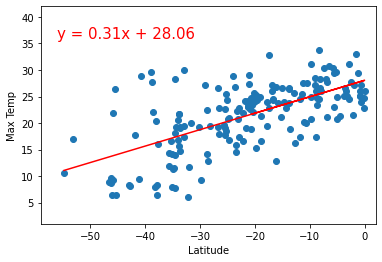

In [69]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_lims = [-59, 2]
y_lims = [1, 42]
ann_coor = [-56, 36]
linear_regression_plot("Max Temp")

**Discussion about the linear relationship:** Both graphs show that the further away you get from a latitude of zero (the Equator), the colder the temperature becomes, and it seems to be roughly the same regardless of whether you go north or south.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07822636600387461


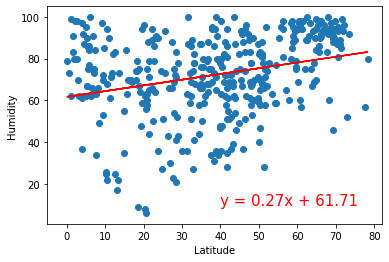

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_lims = [-5, 82]
y_lims = [1, 105]
ann_coor = [40, 10]
linear_regression_plot("Humidity")

The r-value is: 0.01615327174113282


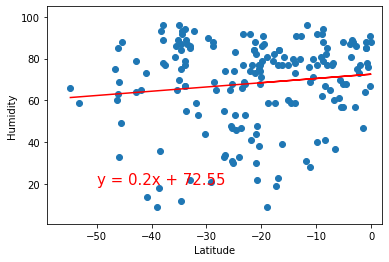

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_lims = [-59, 2]
y_lims = [1, 105]
ann_coor = [-50, 20]
linear_regression_plot("Humidity")

**Discussion about the linear relationship:** Humidity declines very slowly as you go from north to south, but the overall difference is insignificant.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008002076098664233


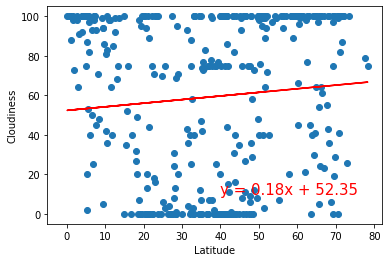

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_lims = [-5, 82]
y_lims = [-5, 105]
ann_coor = [40, 10]
linear_regression_plot("Cloudiness")

The r-value is: 0.17264048266085172


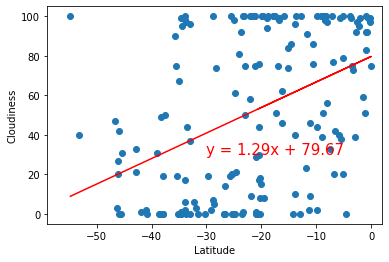

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_lims = [-59, 2]
y_lims = [-5, 105]
ann_coor = [-30, 30]
linear_regression_plot("Cloudiness")

**Discussion about the linear relationship:** This random sample may show difference results depending on what cities are pulled. In general, there is a decrease in cloudiness if you go south from the Equator and an increase in cloudiness if you go north from the Equator. Depending on the cities pulled, it may show a steeper decrease in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.023980775302747413


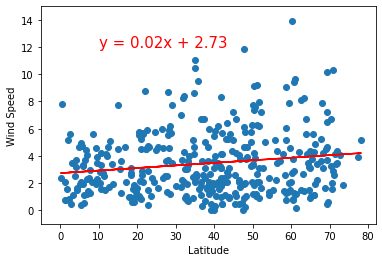

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_lims = [-5, 82]
y_lims = [-1, 15]
ann_coor = [10, 12]
linear_regression_plot("Wind Speed")

The r-value is: 0.03080025672286288


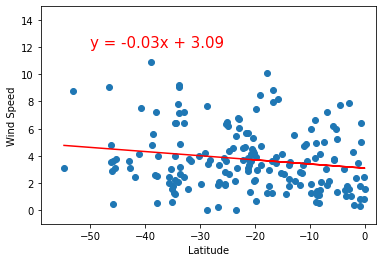

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_lims = [-59, 2]
y_lims = [-1, 15]
ann_coor = [-50, 12]
linear_regression_plot("Wind Speed")

**Discussion about the linear relationship:** Generally, wind speed increases as you move away from the Equator. Though, it doesn't increase much, so there isn't a true correlation here.